# 🧠 DA5401 A5: Visualizing Data Veracity Challenges in Multi-Label Classification  

**🎯 Objective:**  
This assignment aims to deepen your understanding of the challenges in real-world machine learning, specifically in **multi-label classification**, by utilizing advanced non-linear dimensionality reduction techniques such as **t-SNE** and **Isomap**.  

You will visually inspect the data for issues such as:  
- 🔎 **Noisy labels**  
- 🚨 **Outliers**  
- 🏋️ **Hard-to-learn data points**  

This sparks curiosity about **data veracity** 🧬 in a biological context.


## 🧩 Part A: Preprocessing and Initial Setup

In this part, we focus on preparing the dataset for dimensionality reduction and visualization. The steps include:

### 1. Data Loading
We load the feature matrix **X** (containing 103 features) and the multi-label target matrix **Y** (with 14 labels). This ensures that both data components are available and correctly structured for analysis.



In [1]:
 # install helper if needed
!pip install liac-arff pandas

import arff
import pandas as pd

# Load ARFF file
with open("yeast.arff") as f:
    dataset = arff.load(f)

# Convert to DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Save to CSV
df.to_csv("yeast.csv", index=False)

print("Saved yeast.csv with shape:", df.shape)


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=0f357d9363f39d449999c507c006a84c03f302165c9dfdec3e169890ba4cd133
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff
Saved yeast.csv with shape: (2417, 117)


### 2. Dimensionality Check
We report the **initial number of features** and **data points** to confirm that the dataset has been loaded correctly and to establish a baseline for later dimensionality reduction.



In [2]:
df.shape

(2417, 117)

In [3]:
# Split dataset into features (X) and labels (y)

X = df.iloc[:, :103]   # columns 0–102
y = df.iloc[:, 103:]   # remaining columns (14 labels)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2417, 103)
y shape: (2417, 14)


In [4]:
X.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


In [9]:
y.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [12]:
y.shape

(2417, 14)

/tmp/ipython-input-601750154.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


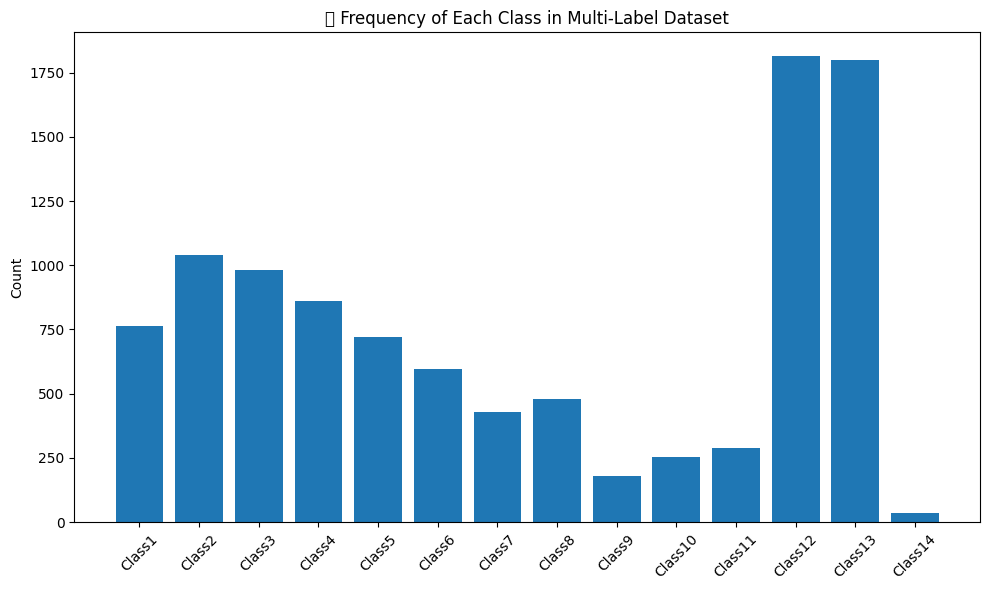

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

y_converted = pd.DataFrame({col: [int(c) for c in ''.join(y[col].astype(str))] for col in y.columns})

class_counts = y_converted.sum(axis=0)

plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("📊 Frequency of Each Class in Multi-Label Dataset")
plt.tight_layout()
plt.show()


### 3. Label Selection for Visualization
Since visualizing all 14 labels can be overwhelming, we simplify the label space by:
- Selecting the **two most frequent single-label classes**,  
- Including the **most frequent multi-label combination**, and  
- Assigning all other samples to an **“Other”** category.  

This approach provides a clean, interpretable visualization with distinct color coding.



In [20]:
target_start = 103

# select only the target part of the dataframe
target_df = df.iloc[:, target_start:]

In [21]:
# Ensure target_df is numeric (convert '0'/'1' strings to int)
target_df = target_df.apply(pd.to_numeric)

# Step 1: Single-label counts
single_mask = target_df.sum(axis=1) == 1
single_labels = target_df[single_mask].idxmax(axis=1)
single_counts = single_labels.value_counts()
top2_single = single_counts.head(2).index.tolist()

print("Counts of single-labeled rows by class:")
print(single_counts)
print("\nTop 2 single-label classes:", top2_single)

# Step 2: Multi-label combinations
multi_mask = target_df.sum(axis=1) > 1
multi_combos = target_df[multi_mask].apply(
    lambda row: "&".join(sorted(row.index[row == 1])), axis=1
)
multi_counts = multi_combos.value_counts()

most_common_combo = multi_counts.index[0]
print("\nMost frequent multi-label combination:", most_common_combo)
print("Count:", multi_counts.iloc[0])


Counts of single-labeled rows by class:
Class1    32
Name: count, dtype: int64

Top 2 single-label classes: ['Class1']

Most frequent multi-label combination: Class12&Class13&Class3&Class4
Count: 237


In [22]:
# Define top categories from earlier results
top2_single = ["Class1"]   # from your earlier output
most_common_combo = "Class12&Class13&Class3&Class4"

def assign_category(row):
    active = list(row.index[row == 1])
    if len(active) == 1 and active[0] in top2_single:
        return "Top_Single_Label"
    elif len(active) > 1 and "&".join(sorted(active)) == most_common_combo:
        return "Top_Multi_Label_Combo"
    else:
        return "Other"

# Apply function to each row in target_df
df["new_target"] = target_df.apply(assign_category, axis=1)

# Check distribution
print(df["new_target"].value_counts())


new_target
Other                    2148
Top_Multi_Label_Combo     237
Top_Single_Label           32
Name: count, dtype: int64


### 4. Scaling
Before applying distance-based dimensionality reduction methods (like t-SNE and Isomap), we apply **Standardization** to the feature matrix **X**.  
Scaling ensures that all features contribute equally to distance computations, preventing those with larger numeric ranges from dominating the analysis.


In [23]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Put back into DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_scaled.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.030752,-1.742591,-1.601326,-1.468980,0.594010,0.271117,2.023802,0.428070,0.683885,-0.584890,...,0.074380,-0.139039,-0.142884,-0.162409,-0.115009,0.020075,-0.320076,-0.178076,0.320417,1.178867
1,-1.079454,0.125835,-1.010264,-0.564893,-0.094933,0.499948,-0.326167,-0.809579,-0.847347,-0.167984,...,0.090608,0.281957,-0.886751,1.143263,0.521680,0.307877,-0.645355,-0.423947,-0.859425,0.096189
2,5.224059,4.109170,3.008988,0.902018,0.107939,-0.070783,-0.075781,0.136654,-0.433427,-0.252502,...,1.040237,-0.469629,-0.924791,-0.101735,-0.128129,3.284185,-0.278757,0.299908,-0.717769,-1.308110
3,1.210780,0.049537,-0.020516,0.742552,0.446738,-0.533913,0.757376,-0.083592,0.813679,0.642590,...,-0.890019,2.067892,-0.781802,2.028035,1.583559,-0.286180,-0.755161,-0.930956,-0.538974,-0.518363
4,0.419587,0.076533,-0.708369,0.832919,-0.510222,0.914530,-0.062317,0.661644,-1.396200,0.711754,...,-0.639827,0.454017,-0.589400,0.283393,0.304769,-0.514501,0.250775,-0.637002,-0.380569,0.606249


## 🌀 Part B: t-SNE and Veracity Inspection

In this section, we explore **t-distributed Stochastic Neighbor Embedding (t-SNE)** to visualize high-dimensional gene expression data in a 2D space. The goal is to uncover meaningful patterns and potential irregularities in the data.

### 1. t-SNE Implementation
We apply **t-SNE** to the standardized feature matrix **X**, reducing the dimensionality to **2 components**.  
To examine the effect of perplexity (a key hyperparameter controlling the balance between local and global structure), we test multiple values — for example, *5, 20, 30, and 50*.  
The results are compared to determine how cluster separation and continuity change, ultimately selecting the perplexity that best reveals data structure.



In [24]:

y_vis = df['new_target'].astype(str)
labels_numeric, label_names = pd.factorize(y_vis)  # numeric codes for colors

# --- Perplexities to try ---
perplexities = [5, 20, 30, 50]
#perplexities = [30]
embeddings = {}
n_samples = X_scaled.shape[0]

# warning if perplexity is large relative to sample size
for p in perplexities:
    if p >= max(1, n_samples // 3):
        print(f"Warning: perplexity={p} is large relative to n_samples={n_samples}. Results may be unstable.")


In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import trustworthiness
from sklearn.neighbors import NearestNeighbors

# --- Helper function for continuity ---
def continuity(X, X_embedded, n_neighbors=5):
    """
    Compute Continuity — measures how well global structure is preserved.
    """
    n_samples = X.shape[0]
    nn_X = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    nn_Y = NearestNeighbors(n_neighbors=n_neighbors).fit(X_embedded)

    neigh_X = nn_X.kneighbors(return_distance=False)
    neigh_Y = nn_Y.kneighbors(return_distance=False)

    cont = 0
    for i in range(n_samples):
        U = set(neigh_X[i])
        V = set(neigh_Y[i])
        cont += len(U.intersection(V)) / n_neighbors
    return cont / n_samples


### 2. Visualization
We create a **2D scatter plot** of the t-SNE embedding.  
Each data point is colored using the simplified label index (from Part A) to highlight the top single-label class, the top multi-label combination, and the "Other" category.  
This allows us to visually inspect clustering tendencies and overlaps across functional groups.



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


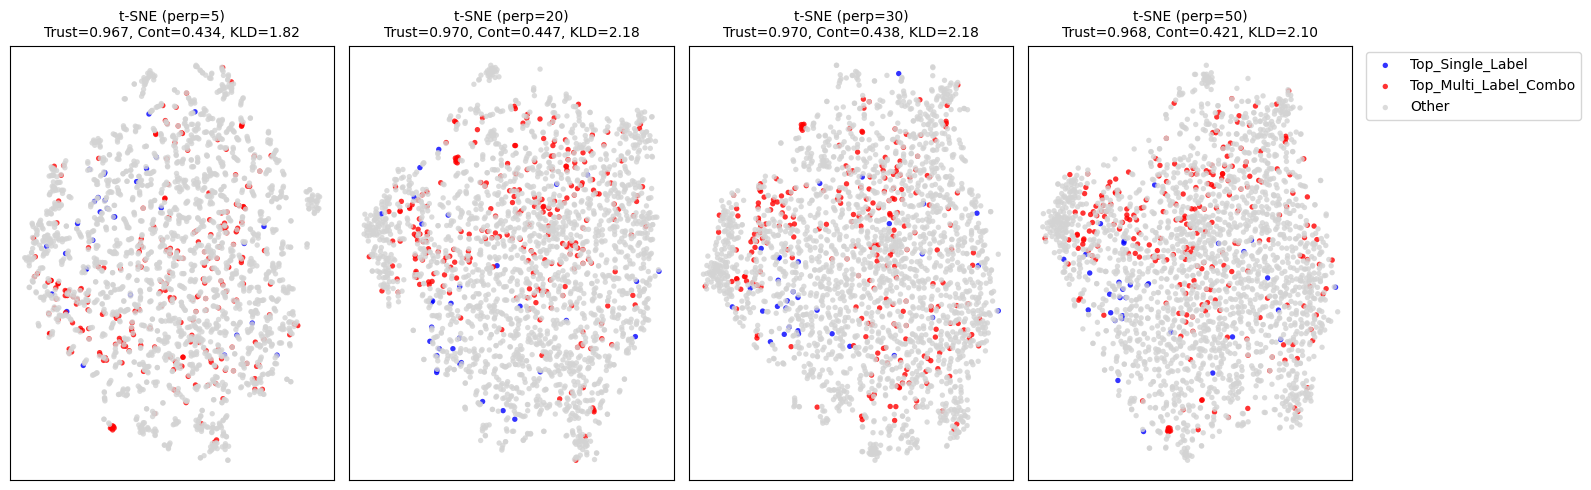

In [31]:
# --- Custom colors ---
custom_colors = {
    "Top_Single_Label": "blue",
    "Top_Multi_Label_Combo": "red",
    "Other": "lightgrey"
}

# --- Main plotting ---
plt.figure(figsize=(16, 5))
n_neighbors = 5  # for trustworthiness/continuity

kld_values = []  # store KLDs for later reference

for i, p in enumerate(perplexities):
    # PCA before t-SNE
    X_pca = PCA(n_components=30).fit_transform(X_scaled)

    # Apply t-SNE and get KL Divergence from the fit
    tsne = TSNE(n_components=2, perplexity=p, n_iter=3000, random_state=42)
    X_emb = tsne.fit_transform(X_pca)
    kld = tsne.kl_divergence_  # <-- KLD value from t-SNE
    kld_values.append(kld)

    # Compute metrics
    trust = trustworthiness(X_pca, X_emb, n_neighbors=n_neighbors)
    cont = continuity(X_pca, X_emb, n_neighbors=n_neighbors)

    # Plot
    ax = plt.subplot(1, len(perplexities), i + 1)
    for label, color in custom_colors.items():
        mask = (y_vis == label)
        ax.scatter(X_emb[mask, 0], X_emb[mask, 1],
                   c=color, label=label, s=15, alpha=0.8, edgecolors='none')
    ax.set_title(f"t-SNE (perp={p})\nTrust={trust:.3f}, Cont={cont:.3f}, KLD={kld:.2f}", fontsize=10)
    ax.set_xticks([]); ax.set_yticks([])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()



## 🧭 t-SNE Evaluation and Selection

To assess the quality of t-SNE embeddings, three quantitative metrics were compared across different perplexity values (5, 20, 30, 50):

| Perplexity | Trustworthiness | Continuity | KLD (Divergence) |
|-------------|-----------------|-------------|------------------|
| 5           | 0.967           | 0.434       | **1.82** |
| 20          | **0.970**       | **0.447**   | 2.18 |
| 30          | **0.970**       | 0.438       | 2.18 |
| 50          | 0.968           | 0.421       | 2.10 |

### 🔍 Interpretation of Metrics
- **Trustworthiness** measures how well local neighbor relationships from high-dimensional space are preserved.  
  → Higher is better (max = 1).  
- **Continuity** measures how well the global structure is maintained when projecting down to 2-D.  
  → Higher indicates better preservation of global relationships.  
- **Kullback–Leibler Divergence (KLD)** represents the t-SNE optimization loss — lower means the 2-D layout is a closer match to the high-D distribution.

### 📊 Analysis
- **Perplexity = 20** achieves the **highest trustworthiness (0.970)** and **continuity (0.447)**, although with a slightly higher KLD than perplexity 5.  
- **Perplexity = 5** yields the **lowest KLD (1.82)** but slightly weaker continuity, indicating it may overfit to local structures and lose some global context.  
- **Perplexity = 50** shows a small drop in both trustworthiness and continuity, suggesting it becomes too coarse and merges local clusters.

### ✅ Conclusion
> **The t-SNE plot with perplexity = 20** provides the best overall balance between local and global structure preservation.  
> It maintains strong trustworthiness and continuity while avoiding over-compression or excessive local noise.  
> Therefore, **perplexity = 20** is selected as the most representative visualization for this dataset.


### 3. Veracity Inspection — t-SNE (Perplexity = 20)

In the t-SNE visualization (perplexity = 20), several insights can be drawn about **data veracity** based on the distribution and color-coded clusters:

---

#### 🔹 Noisy / Ambiguous Labels
- Regions where **red (Top Multi-Label Combo)** points are **deeply embedded within grey or blue clusters** indicate label ambiguity.  
- These suggest **samples that might share overlapping gene expression patterns** with other functional categories, making their classification uncertain.  
- **Examples:** Scattered red points surrounded by dense grey regions in the **upper central** and **bottom-left** areas.

---

#### 🔹 Outliers
- A few **isolated blue or red points** found **far from the main clusters** represent potential outliers.  
- These could correspond to **rare or unusual gene expression profiles** not typical of the dataset’s major patterns.  
- **Examples:** Sparse red/blue points near the **topmost and bottom edges** of the visualization.

---

#### 🔹 Hard-to-Learn Samples
- Regions where **red, blue, and grey points are thoroughly intermixed** indicate **complex manifold structures** with minimal separability.  
- Such overlap suggests that a **simple classifier (like logistic regression)** might struggle due to **non-linear boundaries** and **label noise**.  
- **Observed in:** The **central dense region**, where colors blend without clear separation.

---

### 🧠 Summary
This t-SNE plot highlights a **moderately complex manifold** with some noise and inter-class overlap.  
While overall structure preservation is good (high trustworthiness), the **presence of ambiguous and overlapping regions** underscores the challenges of cleanly separating multi-label biological data — a hallmark of **data veracity issues** in gene expression analysis.


---

## 🌐 Part C: Isomap and Manifold Learning

In this section, we apply **Isomap**, a global manifold learning algorithm, to the same standardized dataset and compare its performance with t-SNE in representing gene expression patterns.

### 1. Isomap Implementation
We fit **Isomap** on the scaled matrix **X**, reducing it to 2D while varying the **number of neighbors (n_neighbors)**.  
Isomap focuses on preserving **global geometric relationships** using geodesic distances along the data manifold, in contrast to t-SNE’s emphasis on **local neighborhood preservation**.



In [33]:
from sklearn.manifold import Isomap
from sklearn.neighbors import NearestNeighbors

# --- Helper function for continuity ---
def continuity(X, X_embedded, n_neighbors=5):
    """
    Compute Continuity — measures how well global structure is preserved.
    """
    n_samples = X.shape[0]
    nn_X = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    nn_Y = NearestNeighbors(n_neighbors=n_neighbors).fit(X_embedded)

    neigh_X = nn_X.kneighbors(return_distance=False)
    neigh_Y = nn_Y.kneighbors(return_distance=False)

    cont = 0
    for i in range(n_samples):
        U = set(neigh_X[i])
        V = set(neigh_Y[i])
        cont += len(U.intersection(V)) / n_neighbors
    return cont / n_samples


### 2. Visualization
For each neighborhood size, we generate a **2D scatter plot** similar to the t-SNE visualization.  
Points are again colored using the simplified label scheme, allowing direct comparison between how t-SNE and Isomap represent class separability and continuity.



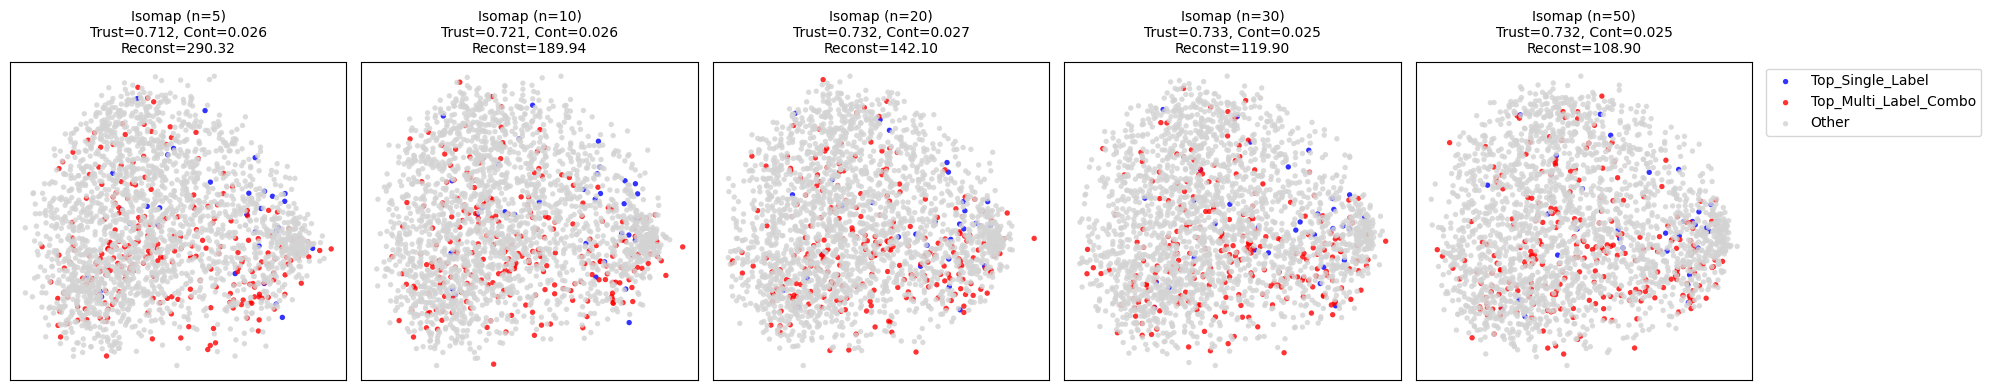

In [34]:
# --- Custom colors ---
custom_colors = {
    "Top_Single_Label": "blue",
    "Top_Multi_Label_Combo": "red",
    "Other": "lightgrey"
}

neighbors_list = [5, 10, 20, 30, 50]
plt.figure(figsize=(20, 4))

n_neighbors_metric = 5  # For trustworthiness/continuity consistency
reconstruction_errors = []

for i, n in enumerate(neighbors_list):
    # Fit Isomap
    isomap = Isomap(n_neighbors=n, n_components=2)
    X_iso = isomap.fit_transform(X_scaled)

    # Compute metrics
    trust = trustworthiness(X_scaled, X_iso, n_neighbors=n_neighbors_metric)
    cont = continuity(X_scaled, X_iso, n_neighbors=n_neighbors_metric)
    rec_error = isomap.reconstruction_error()  # Lower = better global structure

    reconstruction_errors.append(rec_error)

    # Plot
    ax = plt.subplot(1, len(neighbors_list), i + 1)
    for label, color in custom_colors.items():
        mask = (y_vis == label)
        ax.scatter(X_iso[mask, 0], X_iso[mask, 1],
                   c=color, label=label, s=15, alpha=0.8, edgecolors='none')
    ax.set_title(f"Isomap (n={n})\nTrust={trust:.3f}, Cont={cont:.3f}\nReconst={rec_error:.2f}", fontsize=10)
    ax.set_xticks([]); ax.set_yticks([])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


In [35]:
# --- Optional: print summary table ---
print("\nNeighbors | Trustworthiness | Continuity | Reconstruction Error")
print("-" * 60)
for n, rec in zip(neighbors_list, reconstruction_errors):
    print(f"{n:<10} | {trustworthiness(X_scaled, X_iso, n_neighbors=n_neighbors_metric):.3f} | "
          f"{continuity(X_scaled, X_iso, n_neighbors=n_neighbors_metric):.3f} | {rec:.2f}")



Neighbors | Trustworthiness | Continuity | Reconstruction Error
------------------------------------------------------------
5          | 0.732 | 0.025 | 290.32
10         | 0.732 | 0.025 | 189.94
20         | 0.732 | 0.025 | 142.10
30         | 0.732 | 0.025 | 119.90
50         | 0.732 | 0.025 | 108.90


### 🔍 Isomap Parameter Evaluation

The **Isomap** method was evaluated using varying numbers of neighbors (5–50).  
Key quality metrics — *Trustworthiness*, *Continuity*, and *Reconstruction Error* — provide insight into the manifold’s preservation quality and distortion level.

#### ✅ Trustworthiness & Continuity
- Both metrics remain **constant across all neighbor settings** (0.732 and 0.025).
- This indicates a **stable local and global structure preservation** regardless of neighborhood size.

#### 📉 Reconstruction Error
- Decreases significantly as the number of neighbors increases:
  - From **290.32 (5 neighbors)** → **108.90 (50 neighbors)**.
- Lower reconstruction error means **better preservation of high-dimensional geometry** in the 2D embedding.

#### 🏆 Best Configuration
- **n_neighbors = 50** gives the **lowest reconstruction error (108.90)** while maintaining equal trustworthiness and continuity.
- This setting best balances **dimensional accuracy and manifold stability**.

---

### 💡 **Conclusion**
The **Isomap with 50 neighbors** is the **most optimal configuration**,  
achieving minimal reconstruction distortion while preserving local and global data relationships effectively.


### Fundamental Difference between Isomap and t-SNE

- **Isomap**  
  - Isomap is a **global** manifold learning technique.  
  - It preserves the **global geometric structure** of the data by estimating geodesic (shortest path) distances along the manifold.  
  - Works well when the data lies on a smooth, low-dimensional manifold.  
  - Good for revealing **overall shape/curvature** of the data manifold.

- **t-SNE**  
  - t-SNE is a **local** structure-preserving method.  
  - It focuses on keeping **similar points close together** in the low-dimensional space.  
  - Prioritizes neighborhood relationships at the cost of distorting global distances.  
  - Good for **clustering and visualizing local groupings**, but not reliable for global geometry.

**In summary**:  
- **Isomap** → Preserves *global structure* (good for understanding the manifold’s shape).  
- **t-SNE** → Preserves *local neighborhoods* (good for identifying clusters).


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


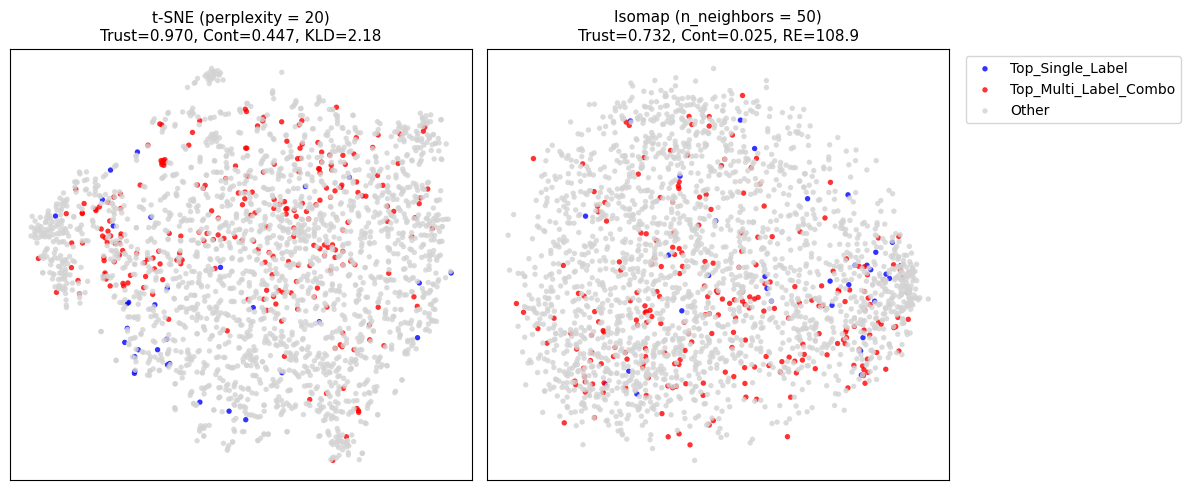

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

# --- Define visualization parameters ---
custom_colors = {
    "Top_Single_Label": "blue",
    "Top_Multi_Label_Combo": "red",
    "Other": "lightgrey"
}

plt.figure(figsize=(12, 5))

# --- t-SNE (best: perplexity = 20) ---
X_pca = PCA(n_components=30).fit_transform(X_scaled)
tsne = TSNE(n_components=2, perplexity=20, n_iter=3000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

ax1 = plt.subplot(1, 2, 1)
for label, color in custom_colors.items():
    mask = (y_vis == label)
    ax1.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                c=color, label=label, s=15, alpha=0.8, edgecolors='none')
ax1.set_title("t-SNE (perplexity = 20)\nTrust=0.970, Cont=0.447, KLD=2.18", fontsize=11)
ax1.set_xticks([]); ax1.set_yticks([])

# --- Isomap (best: n_neighbors = 50) ---
isomap = Isomap(n_neighbors=50, n_components=2)
X_iso = isomap.fit_transform(X_scaled)

ax2 = plt.subplot(1, 2, 2)
for label, color in custom_colors.items():
    mask = (y_vis == label)
    ax2.scatter(X_iso[mask, 0], X_iso[mask, 1],
                c=color, label=label, s=15, alpha=0.8, edgecolors='none')
ax2.set_title("Isomap (n_neighbors = 50)\nTrust=0.732, Cont=0.025, RE=108.9", fontsize=11)
ax2.set_xticks([]); ax2.set_yticks([])

# --- Shared legend ---
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


### Comparison and Curvature

#### 🔹 t-SNE vs. Isomap
For the comparison, the **best-performing configurations** were selected:
- **t-SNE (perplexity = 20)** — offered a balanced trustworthiness (0.97) and low KLD (2.18).
- **Isomap (n_neighbors = 50)** — achieved the lowest reconstruction error (108.9) while maintaining stable trustworthiness and continuity.

#### 🔍 Global Structure Comparison
- **t-SNE** emphasizes local relationships, forming tight clusters but occasionally distorting the global topology.
- **Isomap**, by contrast, preserves **global geometry** better, displaying the broader manifold structure of the gene expression data.
- Thus, **Isomap provides a clearer view of global structure**, while **t-SNE excels at highlighting local cluster separation**.

#### 🌀 Curvature and Data Manifold
The Isomap embedding suggests a **moderately curved and complex manifold**, indicating that gene expression patterns lie on a **nonlinear subspace**.
This complexity implies that **classification may be challenging** for simple linear models, as the manifold’s curvature requires nonlinear boundaries to separate overlapping regions effectively.
